<a href="https://colab.research.google.com/github/adhshba/Homework_Afansyev_Dmitry/blob/main/cauchy_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exact solution:
\$$
y_1(x) = B\pi \cos(\omega x) + \frac{A^2 \pi}{\omega} \sin(\omega x)
$$

$$
y_2(x) = A\pi \cos(\omega x) - \frac{B\pi\omega}{A} \sin(\omega x)
$$

$$
\omega = \sqrt{AB}.
$$

$$
y_1(0)=B\pi,\quad y_2(0)=A\pi.
$$

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [ ]:
A = 7/15
B = 11/20
ksi = 3/8
y_init = [B * np.pi, A * np.pi]
x_init = 0
x_k = np.pi

In [ ]:
def exact_solution(x):
  w = (A * B)**(1/2)
  y1 = B * np.pi * np.cos(w * x) + ((A**2) * np.pi / w) * np.sin(w * x)
  y2 = A * np.pi * np.cos(w * x) - (B * np.pi * w / A) * np.sin(w * x)
  return np.array([y1, y2])

In [ ]:
def exact_solution_with_init(x, y_init):
  w = (A * B)**(1/2)
  y1 = y_init[0] * np.cos(w * x) + (A * y_init[1] / w) * np.sin(w * x)
  y2 = y_init[1] * np.cos(w * x) - (w * y_init[0] / A) * np.sin(w * x)
  return np.array([y1, y2])

In [ ]:
print(exact_solution(np.pi), exact_solution_with_init(np.pi, [B * np.pi, A * np.pi]))

[ 1.31421044 -1.90591243] [ 1.31421044 -1.90591243]


Text(0.5, 0.92, 'Интегральная кривая')

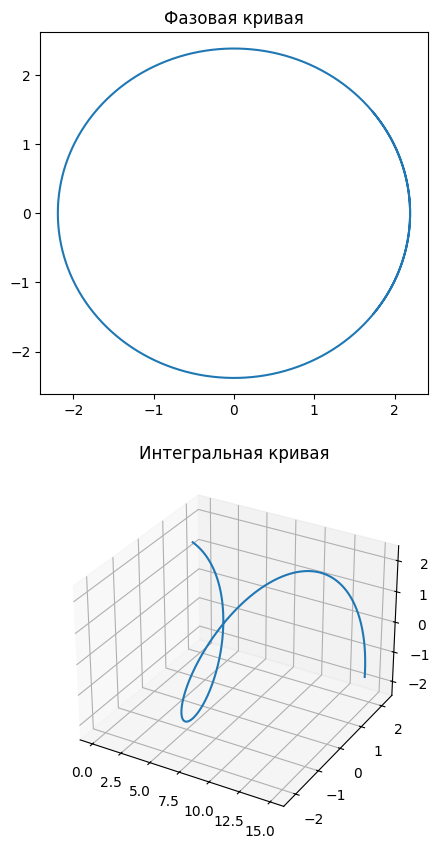

In [ ]:
x = np.linspace(0, 15, 1000)
y1, y2 = exact_solution(x)
fig = plt.figure(figsize=(5, 16))
ax1 = fig.add_subplot(311)
ax1.plot(y1, y2)
ax1.set_title("Фазовая кривая")
ax2 = fig.add_subplot(312, projection="3d")
ax2.plot(x, y1, y2)
ax2.set_title("Интегральная кривая")
#ax2.view_init(elev=0, azim=0)

1.2. Постройте и программно реализуйте алгоритм решения задачи Коши (1) с заданной
точностью (𝜀𝜀 = 10−4) с постоянным шагом интегрирования и оценкой полной погрешности
по методу Рунге. Параметры A, В указаны в Вашем варианте. Начальный шаг выбирать
согласно алгоритму выбора начального шага (стр. 15 методического пособия).

In [ ]:
eps = 1e-4
b1 = 1 - 1/(2 * ksi)
b2 = 1/(2 * ksi)
a21 = ksi
c2 = ksi
s = 2

In [ ]:
def f(x, y):
    y1, y2 = y
    return np.array([A * y2, -B * y1])

exact_sol = solve_ivp(f, [0, np.pi], y_init, max_step=0.2)

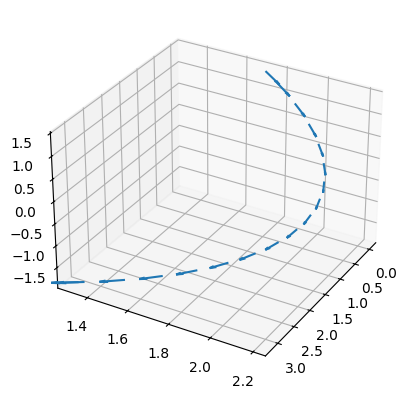

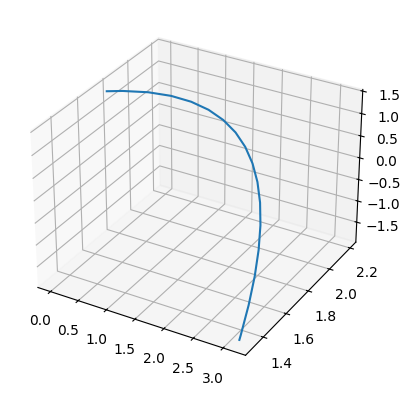

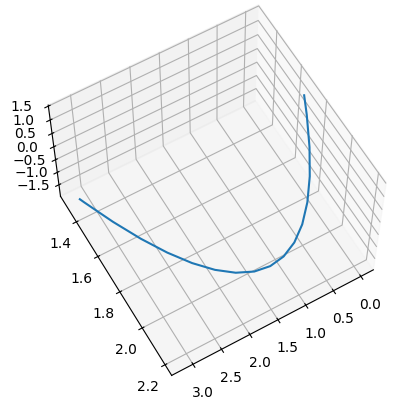

In [ ]:
vector_field = f(exact_sol.t, exact_sol.y)
x = [1] * len(vector_field[0])
len_vector_field = np.sqrt(np.pow(x, 2) + np.pow(vector_field[0], 2)
+ np.pow(vector_field[1], 2))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(exact_sol.t, exact_sol.y[0],
          exact_sol.y[1], x / (5 * len_vector_field),
          vector_field[0] / (5 * len_vector_field),
          vector_field[1] / (5 * len_vector_field))
ax.view_init(elev=30, azim=30)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(exact_sol.t, exact_sol.y[0], exact_sol.y[1])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(exact_sol.t, exact_sol.y[0], exact_sol.y[1])
ax.view_init(elev=60, azim=60)

In [ ]:
def define_start_h(s=2):
    d = np.pow((1 / max(abs(x_init), abs(x_k))), s + 1)
    + np.pow(np.sqrt(np.sum(np.pow(f(x_init, y_init), 2))), s + 1)
    start_h = (eps / d)**(1 / (s + 1)) # начальный шаг
    print(start_h)
    return start_h

In [ ]:
def rk2_with_perm_step(steps):
    y1 = np.array([y_init[0]], dtype=np.longdouble)
    y2 = np.array([y_init[1]], dtype=np.longdouble)
    dots = np.array([x_init], dtype=np.longdouble)
    h = x_k / steps
    step = 1
    x = np.longdouble(x_init + h)
    ind = 0
    while step <= steps:

        dots = np.append(dots, x)
        y1 = np.append(y1, y1[ind] + h * A * y2[ind]
                       - ((h**2) / 2) * A * B * y1[ind])
        y2 = np.append(y2, y2[ind] - h * B * y1[ind]
                       + ((h**2) / 2) * A * B * y2[ind])
        step += 1
        x = h * step
        ind += 1
    return dots, np.array([y1, y2])

In [ ]:
def runge_global(y_h, y_h2, s):
    return np.max(np.abs((y_h2[:, ::2] - y_h) / (1 - 2**(-s))))

In [ ]:
def solve_de(start_h):
    eps = 10e-4
    err = 1
    h = np.longdouble(start_h)
    steps = np.ceil(x_k / h)
    dots_h, y_h = rk2_with_perm_step(h)
    while err >= eps:
        steps *= 2; h /= 2
        dots_h2, y_h2 = rk2_with_perm_step(steps)
        err = runge_global(y_h, y_h2, 2)
        dots_h, y_h = dots_h2, y_h2
    return (dots_h, y_h), err, int(steps / 2)

0.14581981380662323
1408
1.3142104294158374 -1.9059124189756262
1.3143137355407159141 -1.9063552055126242278


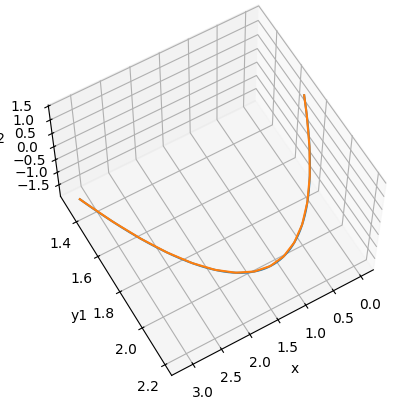

In [ ]:
start_h = define_start_h()
solution, err, opt_steps_rk2 = solve_de(start_h)
print(opt_steps_rk2)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot(solution[0], solution[1][0], solution[1][1])
ax.plot(exact_sol.t, exact_sol.y[0], exact_sol.y[1])
ax.set_xlabel("x")
ax.set_ylabel("y1")
ax.set_zlabel("y2")
ax.view_init(elev=60, azim=60)
print(exact_sol.y[0][-1], exact_sol.y[1][-1])
print(solution[1][0][-1], solution[1][1][-1])

In [ ]:
def runge_local(y1, y2, y1_h, y2_h, s=2):
    diff = np.array([y1 - y1_h, y2 - y2_h])
    err = np.max(np.abs(diff)) / (2**s - 1)
    return err

In [ ]:
def rk_with_var_step(start_h, eps=1e-5):
    s = 2 # порядок
    y1 = y_init[0]
    y2 = y_init[1]
    y1_arr = [y1]
    y2_arr = [y2]
    dots = [0]
    x = x_init
    amount_of_calls = 0

    h = start_h
    while x != x_k:
        if (x + h) > x_k:
            h = x_k - x
        y1_new = y1 + h * A * y2 - ((h**2) / 2) * A * B * y1 # y(x + h)
        y2_new = y2 - h * B * y1 + ((h**2) / 2) * A * B * y2

        y1_h2 = y1 + (h/2) * A * y2 - (((h/2)**2) / 2) * A * B * y1 # y(x + h/2)
        y2_h2 = y2 - (h/2) * B * y1 + (((h/2)**2) / 2) * A * B * y2
        y1_h = y1_h2 + (h/2) * A * y2_h2 - (((h/2)**2) / 2) * A * B * y1_h2
        y2_h = y2_h2 - (h/2) * B * y1_h2 + (((h/2)**2) / 2) * A * B * y2_h2

        amount_of_calls += 6
        err = runge_local(y1_new, y2_new, y1_h, y2_h, 2)
        ratio = err / 1 # !!!!!
        print(err)
        if err > eps * 2**s:
            h /= 2
            continue
        x += h
        dots.append(x)
        if eps < err <= eps * 2**s:
            h /= 2
        elif err < eps / (2**s + 1):
            h *= 2

        y1 = y1_h
        y2 = y2_h
        y1_arr.append(y1)
        y2_arr.append(y2)
    return np.array(dots), np.array(y1_arr), np.array(y2_arr), ratio, amount_of_calls

0.14581981380662323


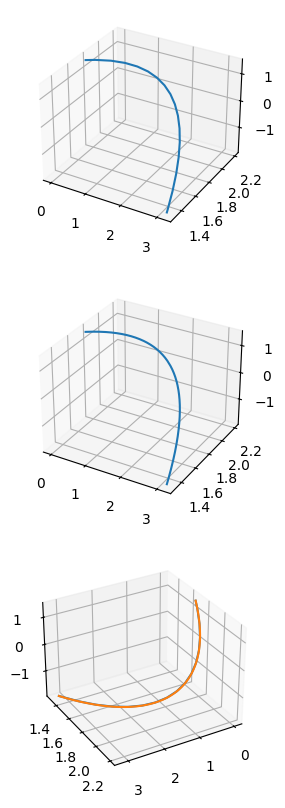

In [ ]:
start_h = define_start_h()
dots, y1_arr, y2_arr = rk_with_var_step(start_h)

fig = plt.figure(figsize=(7, 10))
ax1 = fig.add_subplot(311, projection="3d")
ax1.plot(exact_sol.t, exact_sol.y[0], exact_sol.y[1])
ax2 = fig.add_subplot(312, projection="3d")
ax2.plot(dots, y1_arr, y2_arr)
ax3 = fig.add_subplot(313, projection="3d")
ax3.plot(exact_sol.t, exact_sol.y[0], exact_sol.y[1])
ax3.plot(dots, y1_arr, y2_arr)
ax3.view_init(elev=30, azim=60)

1.3142104366592424 -1.9059124263731357 -- точное решение

1.3142104366592289, -1.9059124263731613) -- самое точное решение


In [ ]:
def rk3_one_step(x, y1, y2, h):
    #parameters
    b = np.array([1/6, 2/3, 1/6])
    c = np.array([0, 1/2, 1])
    a = [[], [1/2], [-1, 2]]
    #init
    k = np.zeros((3, 2))
    k[0] = h * f(x, (y1, y2))
    for i in range(1, 3):
        k[i] = h * f(x + c[i] * h, (y1 + np.dot(a[i], k[:i, 0]),
                                    y2 + np.dot(a[i], k[:i, 1])))
    return np.array([y1 + np.dot(k[:, 0], b), y2 + np.dot(k[:, 1], b)])

In [ ]:
def rk3_perm_step(steps):
    y1_arr = [y_init[0]]
    y2_arr = [y_init[1]]
    h = x_k / steps
    y1, y2 = y_init
    x = x_init
    for i in range(int(steps)):
        y1, y2 = rk3_one_step(x, y1, y2, h)
        y1_arr.append(y1)
        y2_arr.append(y2)
    return np.array([y1_arr, y2_arr])

In [ ]:
# @title
err = 1
eps = 1e-4
start_h = define_start_h(s=3)
start_steps = int(np.ceil(x_k / start_h))
steps = start_steps
y1, y2 = rk3_perm_step(start_steps)
while eps < err:
    steps *= 2
    y1_h, y2_h = rk3_perm_step(steps)
    err = runge_global(np.array([y1, y2]), np.array([y1_h, y2_h]), 3)
    y1, y2 = y1_h, y2_h
opt_steps_rk3 = int(steps / 2)

0.3141592653589793


3.2. Для выбранного метода (схемы оппонента) из п. 3.1 и реализованного Вами в п.1.2 2-
х этапного ЯМРК 2-го порядка для решения задачи Коши (1) с постоянным шагом
определите величину шага интегрирования ℎ, обеспечивающего вычисление
приближенного решения с заданной точностью (𝜀 = 10-4). Постройте графики
зависимости истинной полной погрешности от значения независимой переменной 𝑥 при
интегрировании с полученным шагом ℎ.

Exact solution:
\$$
y_1(x) = B\pi \cos(\omega x) + \frac{A^2 \pi}{\omega} \sin(\omega x)
$$

$$
y_2(x) = A\pi \cos(\omega x) - \frac{B\pi\omega}{A} \sin(\omega x)
$$

$$
\omega = \sqrt{AB}.
$$

$$
y_1(0)=B\pi,\quad y_2(0)=A\pi.
$$

In [ ]:
def exact_solution(x):
  w = (A * B)**(1/2)
  y1 = B * np.pi * np.cos(w * x) + ((A**2) * np.pi / w) * np.sin(w * x)
  y2 = A * np.pi * np.cos(w * x) - (B * np.pi * w / A) * np.sin(w * x)
  return np.array([y1, y2])

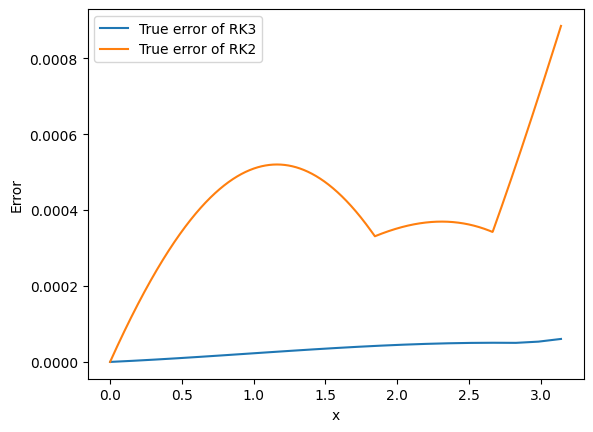

In [ ]:
y_approximate_rk3 = rk3_perm_step(opt_steps_rk3)
dots_rk3 = np.linspace(0, x_k, opt_steps_rk3 + 1)
y_true_rk3 = np.array(exact_solution(dots_rk3))
diff = np.abs(y_approximate_rk3 - y_true_rk3)
err_x_rk3 = np.max(diff, axis=0)

dots_rk2, y_approximate_rk2 = rk2_with_perm_step(opt_steps_rk2)
y_true_rk2 = np.array(exact_solution(dots_rk2))
diff_rk2 = np.abs(y_approximate_rk2 - y_true_rk2)
err_x_rk2 = np.max(diff_rk2, axis=0)

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(dots_rk3, err_x_rk3, label="True error of RK3")
ax.plot(dots_rk2, err_x_rk2, label="True error of RK2")
ax.set_xlabel("x")
ax.set_ylabel("Error")
ax.legend()

3.3. Для схемы оппонента из п. 3.1 и реализованного Вами в п.2.1 2-х этапного ЯМРК 2-
го порядка для решения задачи Коши (1) с автоматическим выбором шага интегрирования
постройте:

3.3.1 графики зависимости величины шага интегрирования от значения независимой
переменной 𝑥;

In [ ]:
def rk3_var_step(start_h, eps=1e-5, x_k=np.pi):
    h = start_h
    y1 = y_init[0]
    y2 = y_init[1]
    y1_arr = [y1]
    y2_arr = [y2]
    dots = [0]
    x = x_init
    flag = False
    s = 3
    ratio = []
    amount_of_calls = 0

    while x != x_k:
        if (x + h) > x_k:
            h = x_k - x

        y1_new_ap, y2_new_ap = rk3_one_step(x, y1, y2, h)

        y1_h2, y2_h2 = rk3_one_step(x, y1, y2, h/2)
        y1_h, y2_h = rk3_one_step(x + (h/2), y1_h2, y2_h2, h/2)
        amount_of_calls += 9
        y1_new_true, y2_new_true = rk3_one_step(x, *exact_solution(x), h)
        y1_true, y2_true = exact_solution(x + h)
        true_err = np.max(np.abs([y1_true - y1_new_true, y2_true - y2_new_true]))


        err = runge_local(y1_new_ap, y2_new_ap, y1_h, y2_h, s=3)
        ratio.append(true_err / err)
        #print(err, true_err)
        if err > eps * 2**s:
            h /= 2
            continue
        x += h
        dots.append(x)
        if eps < err <= eps * 2**s:
            h /= 2
        elif err < eps / (2**s + 1):
            h *= 2

        y1 = y1_h
        y2 = y2_h
        y1_arr.append(y1)
        y2_arr.append(y2)

    return np.array(dots), np.array(y1_arr), np.array(y2_arr), ratio, amount_of_calls

0.3141592653589793
0.3141592653589793
0.006184871554967941
0.0015471366340383448
0.00038684158009065034
9.67139838714548e-05
2.4178720270902804e-05
5.967759290218903e-06
5.9289947242173e-06
5.890083005703299e-06
5.851025095537921e-06
5.811821957912855e-06
5.772474561016594e-06
5.732983876442314e-06
5.693350879335905e-06
5.6535765483959706e-06
5.613661865799813e-06
5.573607817129418e-06
5.533415391741532e-06
5.493085581953494e-06
5.4526193840054304e-06
5.412017797246094e-06
5.371281824206875e-06
5.330412471193924e-06
5.289410747473984e-06
5.2482776657925e-06
5.2070142419295235e-06
5.165621495291835e-06
5.124100448024767e-06
5.082452125900379e-06
5.040677557577311e-06
4.998777774748812e-06
4.956753812660845e-06
4.914606709371938e-06
4.8723375058272e-06
4.829947246302406e-06
4.787436977885899e-06
4.74480775084866e-06
4.7020606179781765e-06
4.659196635762679e-06
4.616216862910842e-06
4.573122361165953e-06
4.529914195231892e-06
4.486593432551089e-06
4.4431611436005864e-06
4.3996184012999135

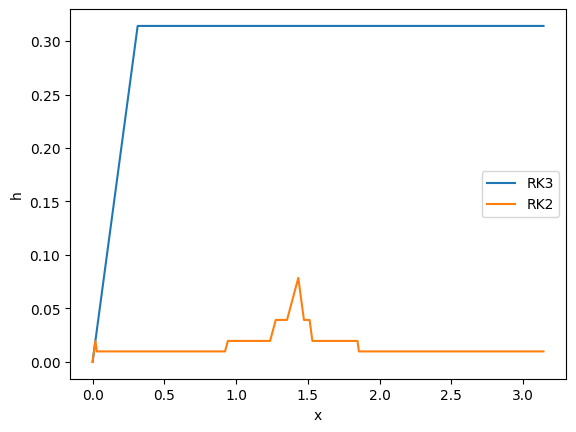

In [ ]:
start_h = define_start_h(s=3)
dots_var_rk3, y1_arr_var_rk3, y2_arr_var_rk3, ratio, amount_of_calls3 = rk3_var_step(start_h)
h_rk3 = dots_var_rk3[1:] - dots_var_rk3[:-1]
h_rk3 = np.concatenate(([0], h_rk3))

start_h2 = define_start_h(s=3)
dots_var_rk2, y1_arr_var_rk2, y2_arr_var_rk2, ratio, amount_of_calls2 = rk_with_var_step(start_h2)
h_rk2 = dots_var_rk2[1:] - dots_var_rk2[:-1]
h_rk2 = np.concatenate(([0], h_rk2))

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(dots_var_rk3, h_rk3, label="RK3")
ax.plot(dots_var_rk2, h_rk2, label="RK2")
ax.set_ylabel("h")
ax.set_xlabel("x")

ax.legend()

3.3.2 графики зависимости отношения истинной локальной погрешности к полученной
оценке локальной погрешности от значения независимой переменной 𝑥(см. формулу (91)).

0.3141592653589793
0.14581981380662323
5.875853704230748e-06 4.730947520337203e-05
6.495884542585222e-06 5.219650637311446e-05
6.951704786991744e-06 5.5764085340470615e-05
7.2317930636270745e-06 5.7922028866119746e-05
7.329070322954172e-06 5.861578725863126e-05
7.241078757428251e-06 5.782782330809866e-05
6.970043901092079e-06 5.5578055605742804e-05
6.522818339428836e-06 5.192335502468559e-05
5.91070845572845e-06 4.695610711080711e-05
5.661924016773869e-06 4.568779459623862e-05


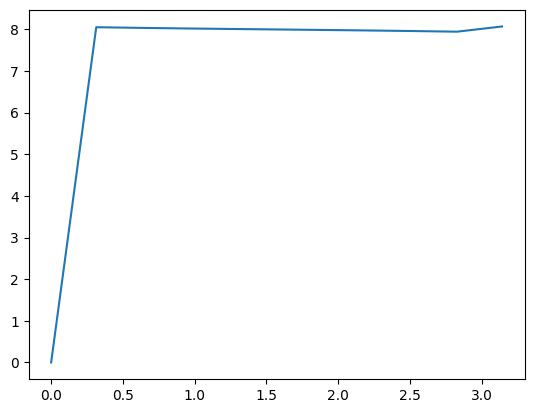

In [ ]:
start_h = define_start_h(s=3)
start_h_s2 = define_start_h(s=2)
dots_var_rk3, y1_arr_var_rk3, y2_arr_var_rk3, ratio, amount_of_calls3 = rk3_var_step(start_h)
#dots_var_rk2, y1_arr_var_rk2, y2_arr_var_rk2, ratio = rk_with_var_step(start_h_s2)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(dots_var_rk3, [0] + ratio)

0.14581981380662323
0.3141592653589793
0.0013333184140464915
0.00482669058442912
0.015023485589252613
0.022965417686172624
0.038614736040341636
0.0013333184140464915
0.00482669058442912
0.0037635792118336044
0.002606687702846777
0.001380246397192667
0.00044017175852040236
0.03899260368872426
0.0005490635073693481
0.0013333184140464915
0.0003018612292577198
0.0002852389297784974
0.000268216108828397
0.0002508157191298821
0.0002330612442207336
0.0002149766667753905
0.0001965864362236299
0.0007115707083470054
0.0005601784682810104
0.0004053157322808458
0.0002478182071326505
8.853826053056384e-05
0.00028649205731882493
0.0015677911251226566
0.0007075794422333562
0.0008592931069215659
0.001006731223570793
0.00028730611703757053
0.00030436618951619937
0.0003210226233581655
0.00033725241709473924
0.00035303313567336403
0.00036834294145397334
0.00038316062441260773
0.0003974656315079243
0.00041123809517247995
0.0004244588608877109
3.4387069138090234e-06
0.0013333184140464915
0.0003333722478907

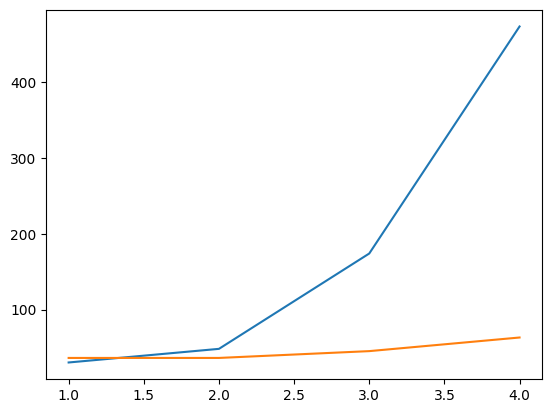

In [ ]:
start_h2 = define_start_h()
start_h3 = define_start_h(s=3)
e3 = []; e2 = []
for i in range(1, 5):
  dots_var_rk3, y1_arr_var_rk3, y2_arr_var_rk3, ratio3, amount_of_calls3 = rk3_var_step(start_h3, eps=10**(-i))
  dots_var_rk2, y1_arr_var_rk2, y2_arr_var_rk2, ratio2, amount_of_calls2 = rk_with_var_step(start_h2, eps=10**(-i))
  e3.append(amount_of_calls3)
  e2.append(amount_of_calls2)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(range(1, 5), e2, label="RK2")
ax.plot(range(1, 5), e3, label="RK3")

0.14581981380662323


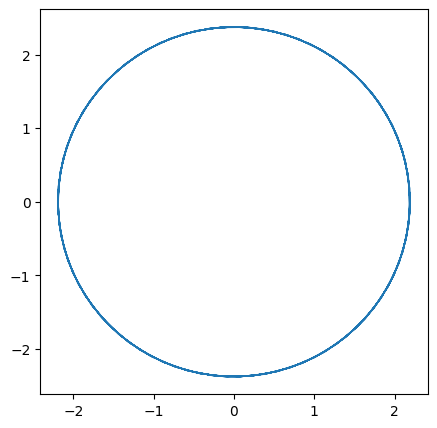

In [ ]:
start_h = define_start_h()
x_coor, y1_coor, y2_coor, rat = rk3_var_step(start_h, x_k=100)
x_coor_ex = np.linspace(0, 20, 5000)
y1_coor_ex, y2_coor_ex = exact_solution(x_coor_ex)
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot()
ax1.plot(y1_coor, y2_coor, linewidth=1)
#ax1.plot(y1_coor_ex, y2_coor_ex, linewidth=1)

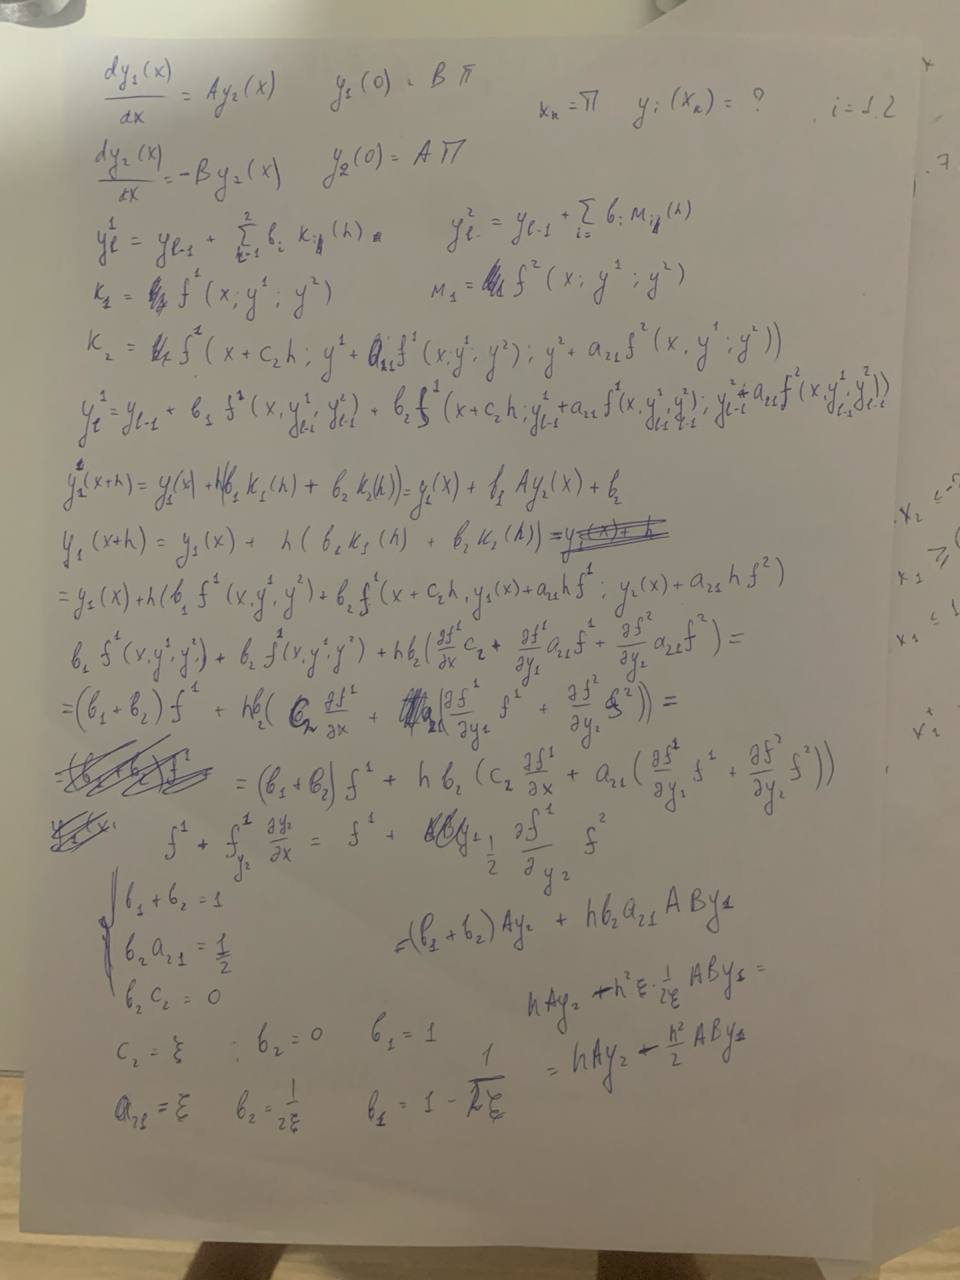